# Customer Segmentation using DBSCAN

## Objectives
1. **Load and Prepare the Dataset**: Standardize numerical features.
2. **Visualization 1 — K-Distance Graph**: Select an appropriate `eps` value.
3. **Visualization 2 — Initial DBSCAN Clustering**: `eps=1.2, min_samples=5`.
4. **Visualization 3 — Final DBSCAN Clustering**: `eps=2, min_samples=3`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# 1. Load and Prepare the Dataset
df = pd.read_excel('ML470_S8_Customer_Data_Concept.xlsx')

# Select only numerical columns and drop missing values
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

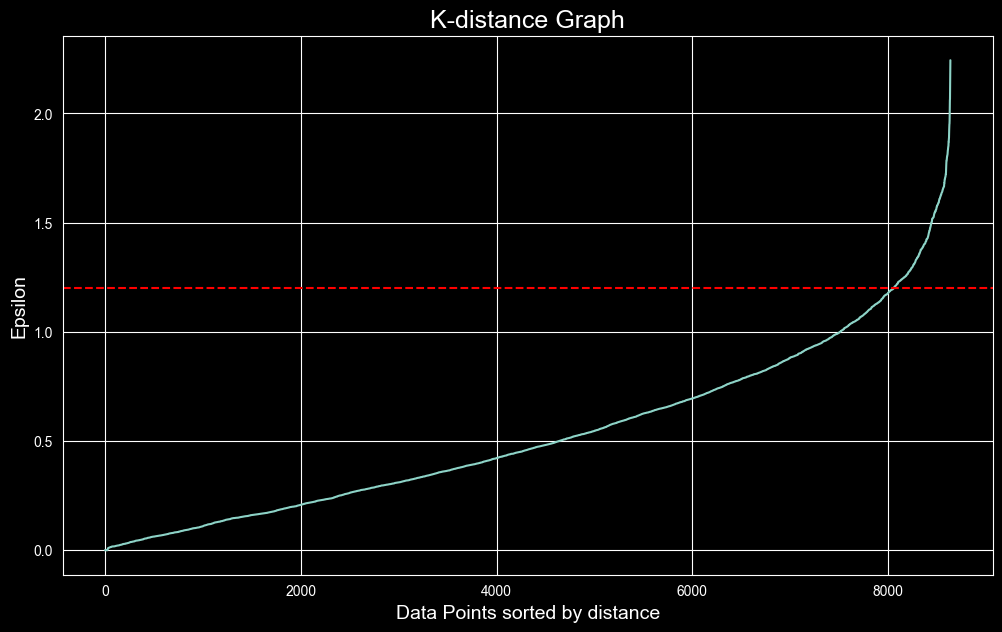

In [2]:
# 2. Visualization 1 — K-Distance Graph for eps Selection
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, 1], axis=0)

plt.figure(figsize=(12, 7))
plt.plot(distances)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.title('K-distance Graph', fontsize=18)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

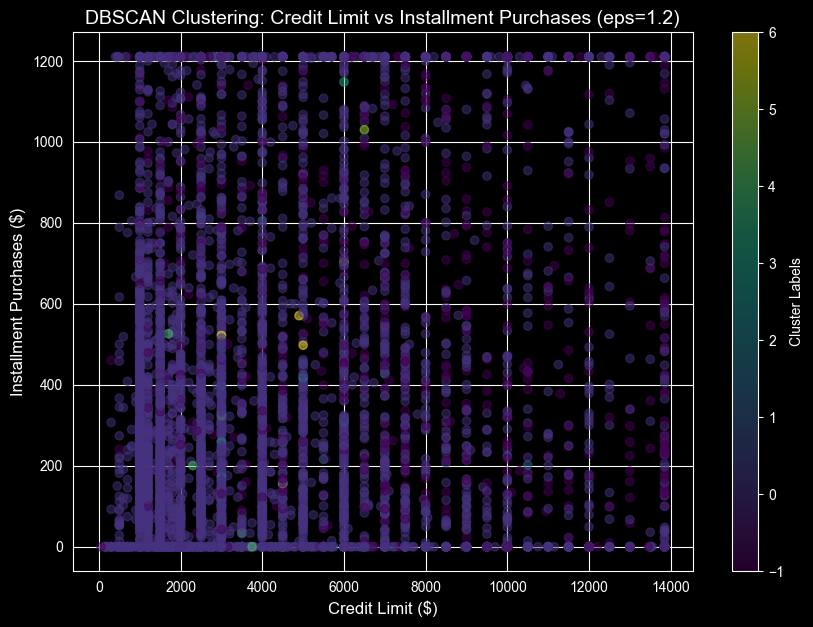

In [3]:
# 3. Visualization 2 — Initial DBSCAN Clustering
dbscan_initial = DBSCAN(eps=1.2, min_samples=5)
clusters_initial = dbscan_initial.fit_predict(X_scaled)
df_numeric['cluster_initial'] = clusters_initial

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_numeric['credit_limit'], 
    df_numeric['installments_purchases'], 
    c=df_numeric['cluster_initial'], 
    cmap='viridis', 
    alpha=0.5
)
plt.colorbar(scatter, label='Cluster Labels')
plt.title('DBSCAN Clustering: Credit Limit vs Installment Purchases (eps=1.2)', fontsize=14)
plt.xlabel('Credit Limit ($)', fontsize=12)
plt.ylabel('Installment Purchases ($)', fontsize=12)
plt.show()

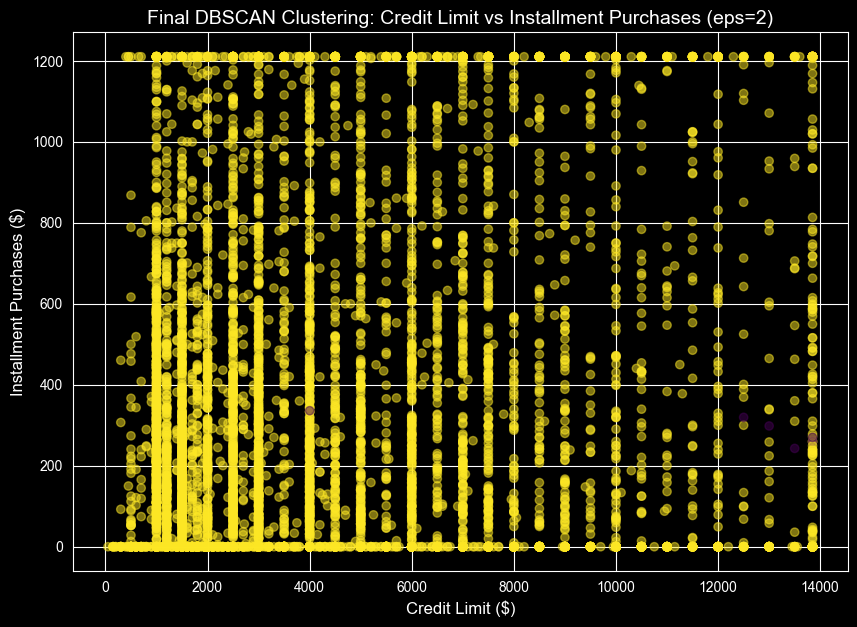

In [4]:
# 4. Visualization 3 — Final DBSCAN Clustering
dbscan_final = DBSCAN(eps=2, min_samples=3)
clusters_final = dbscan_final.fit_predict(X_scaled)
df_numeric['cluster_final'] = clusters_final

plt.figure(figsize=(10, 7))
plt.scatter(
    df_numeric['credit_limit'], 
    df_numeric['installments_purchases'], 
    c=df_numeric['cluster_final'], 
    cmap='viridis', 
    alpha=0.5
)
plt.title('Final DBSCAN Clustering: Credit Limit vs Installment Purchases (eps=2)', fontsize=14)
plt.xlabel('Credit Limit ($)', fontsize=12)
plt.ylabel('Installment Purchases ($)', fontsize=12)
plt.show()